<a id="top"></a>
# Regression Apple Prices Prediction Notebook
###  <sup>
<img src="" align="left">

### Table of Contents
---
1. [Introduction](#intro)
---
2. [Load Dependencies](#imports)
---
3. [Data Cleaning](#data)
---
4. [Exploratory Data Analysis](#EDA)
---
5. [Data Preprocessing](#preprocessing) 
---
6. [Modelling](#modelling)
---
7. [Performance Evaluation](#evaluation)
---
8. [Model Analysis](#analysis)
---
9. [Conclusion](#conclusion)

<a id="intro"></a>
## 1. Introduction  

### Project Description

Machine learning is a powerful branch of Artificial Intelligence, dating as far back as 1952,  developed to teach computer systems how to make decisions emanated from preexisting data. Mathematical algorithms are applied to training data which allows a machine to identify patterns and make predictions for unseen datasets.

Regression is a popular supervised statistical learning method that aims to predict the value of a dependent variable (y) based on an independent variable (x). The relationship between the variables can be linear or nonlinear.

Data-driven price forecasting allows businesses to make decisions informed by their historical data and sales behavior and the ongoing evolution of market dynamics. AI price forecasts can be improved over time as more data becomes available and machine learning technologies mature. As a result, businesses can price their products or services in a way that maximizes profitability while still being competitive on price points for their customers.


### Problem Statement
Build a regression model that will predict an accurate average price of the Apple of Golden Delicious.


### Datasets and Variables
The dataset includes Province, Container, Size Grade, Weight Kg, Commodities, Date, Low Price, High Price, Sales Total, Total Qty Sold, Total Kg Sold, Stock On Hand, average price per kg. The challenge is to predict the average price per kilogram of Apples Golden Delicious. The training dataset has 64376 rows which includes other commodities (i.e. APPLE GRANNY SMITH, AVOCADO PINKERTON, TOMATOES-LONG LIFE etc.) while the testing dataset only contains the commodity **APPLE GOLDEN DELICIOUS** so in our training dataset we have to remove the rows which contain commodities which are not **APPLE GOLDEN DELICIOUS** so that we only train our model to accurately predict the **average price per kilogram** of apple golden delicious. We are looking at a dataset from one of the fresh producing industry in South Africa. 

**train:** The dataset that will be used to train our model  
**test:** The dataset to which we will apply our model so we predict the **avg_price_per_kg**  

<a id="imports"></a>
## 2. Load Dependencies

In [10]:
#remove comment to install
#!pip install scikit-learn folium 
!pip install pygeohash 
!pip install catboost 
!pip install xgboost 
!pip install lightgbm
!pip install missingno

  Using cached pygeohash-1.2.0-py2.py3-none-any.whl
  Using cached catboost-1.2.3-cp38-cp38-win_amd64.whl (101.1 MB)
  Using cached plotly-5.20.0-py3-none-any.whl (15.7 MB)
  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)


In [96]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')
# Prerequisites

# Load Dependencies
import time
import pickle
#import folium
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

import seaborn as sns
import xgboost as xgb
import pygeohash as gh
import lightgbm as lgbm

#import folium.plugins as plugins

from math import sqrt
from sklearn import metrics
from sklearn.svm import SVR
#from folium.plugins import HeatMap
#from IPython.display import display
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from scipy.stats import boxcox, zscore
from statsmodels.formula.api import ols
#from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

<a id="data"></a>
## 3. Data Cleaning

### Load Data

In [97]:
#Reading data
train_data = pd.read_csv('https://raw.githubusercontent.com/Iddo-Smith/regression-apples-predict-api-template/main/edsa-apple-prices-challenge/df%20-%20train_set.csv')
test_data =pd.read_csv('https://raw.githubusercontent.com/Iddo-Smith/regression-apples-predict-api-template/main/edsa-apple-prices-challenge/df%20-%20test_set.csv')
train_data = train_data[train_data['Commodities'].str.contains('APPLE GOLDEN DELICIOUS')]

In [98]:
test_data.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


<a id="EDA"></a>
## 4. Exploratory Data Analysis

 This is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

### Handle Missing Data

<AxesSubplot:>

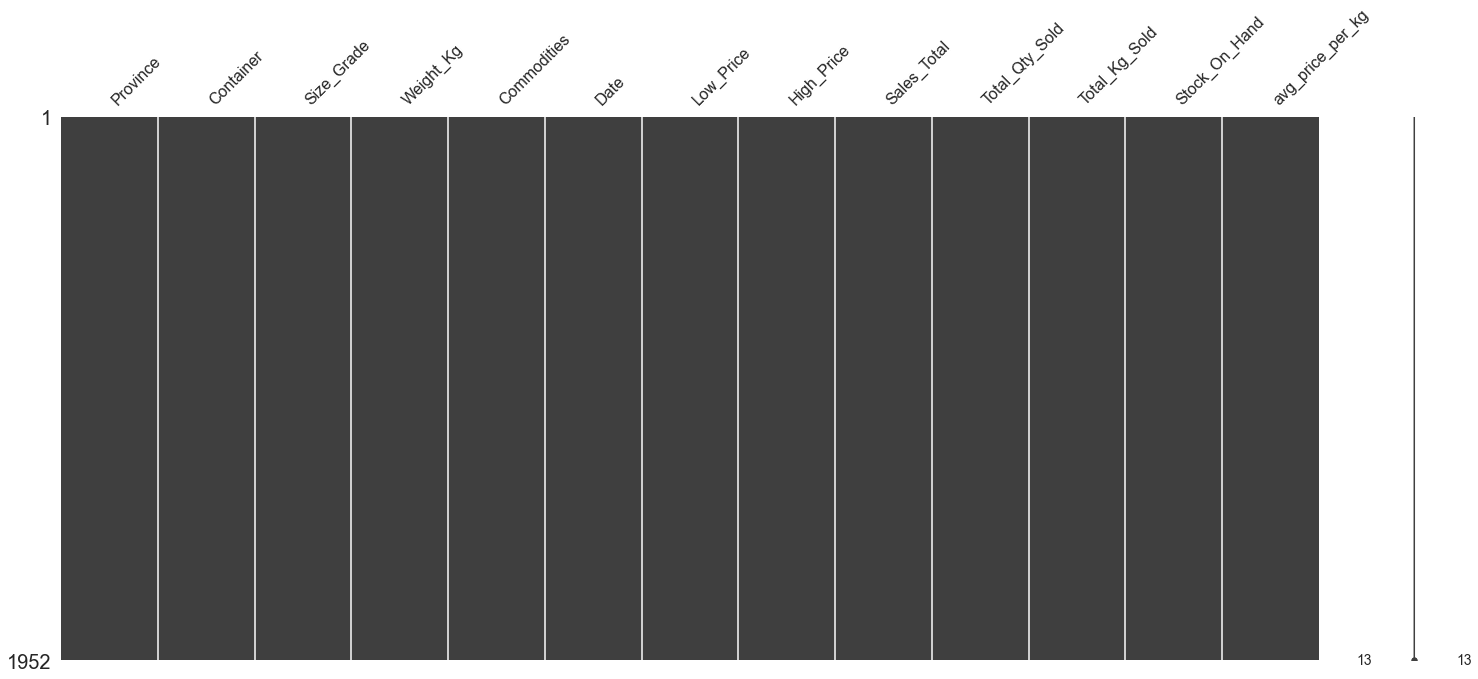

In [99]:
msno.matrix(train_data) 

**Dealing with missing data:**
* Our training data has no missing rows.

### Identifying Outliers
Outliers are values which deviate immensely from other observations. It is important to identify outliers because the performance of many algorithms is sensitive to them, leading to inaccurate models and consequently poor predictions.

#### Outliers in our Training data

<AxesSubplot:ylabel='avg_price_per_kg'>

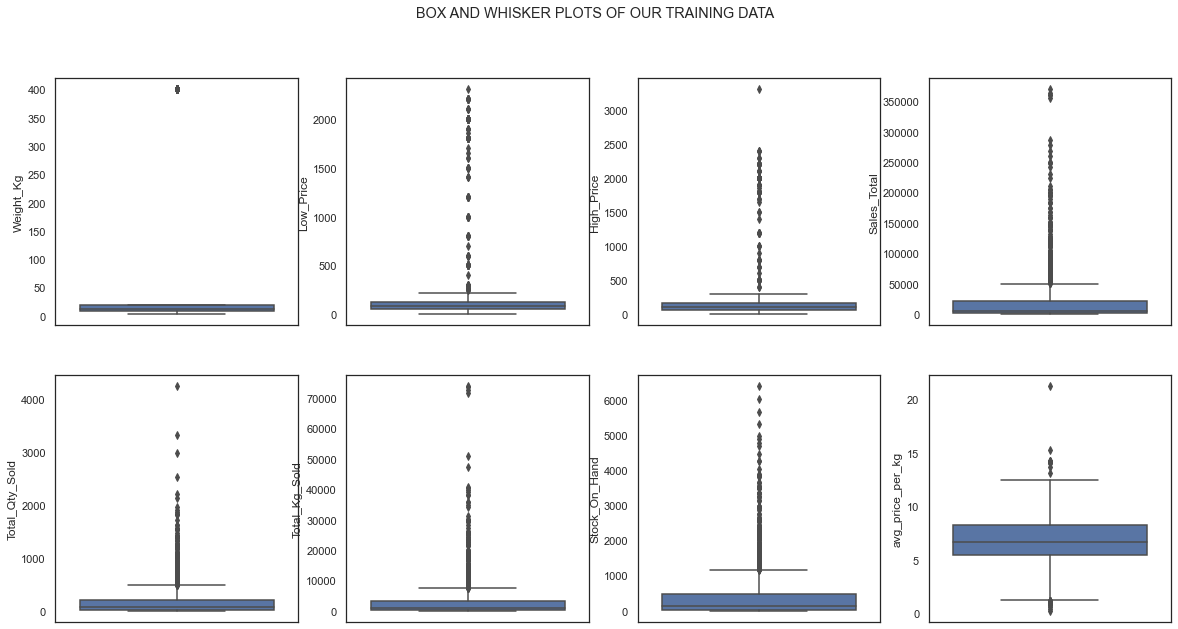

In [100]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF OUR TRAINING DATA')
sns.boxplot(ax = axes[0, 0], data=train_data, y='Weight_Kg')
sns.boxplot(ax = axes[0, 1], data=train_data, y='Low_Price')
sns.boxplot(ax = axes[0, 2], data=train_data, y='High_Price')
sns.boxplot(ax = axes[0, 3], data=train_data, y='Sales_Total')
sns.boxplot(ax = axes[1, 0], data=train_data, y='Total_Qty_Sold')
sns.boxplot(ax = axes[1, 1], data=train_data, y='Total_Kg_Sold')
sns.boxplot(ax = axes[1, 2], data=train_data, y='Stock_On_Hand')
sns.boxplot(ax = axes[1, 3], data=train_data, y='avg_price_per_kg')
#sns.boxplot(ax = axes[1, 4], data=train, y='Weight_Kg')

#### How we will deal without outliers

Since outliers affect the performance of our model we will only  remove values if the Z-score value is greater than 3 or less than -3, that data point will be identified as an outlier

#### These are the columns present in the training dataset and the testing dataset

In [101]:
train_data.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

### Data Summary Statistics

In [102]:
train_data.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

The variables which show a big number on the kurtosis they are the ones with sharpness on the peak and Total_Kg_Sold ranks number one followed by Total_Qty_Sold etc. this is for our training dataset

#### skewness in our variables

In [103]:
train_data.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

What is interesting to note here is the skewness of the average price per kilogram is 0.082452 which means we will see a normal distribution like graph when we draw the graph of avg_price_per_kg versus frequency. 

In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [105]:
train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


### Univariate Analysis and Visualisation

In this section we will describe and visualise data that involves a single variable:  


* Province - Which province the produce was grown
* Container - The code for the type of container
* Size_Grade - The class of the produce according to their quality
* Weight_Kg - The total weight in kilograms
* Commodities - The type of produce, e.g. Golden Delicious Apples
* Date - The date of the sale
* Sales_Total - The total sales price
* Total_Qty_Sold - The number of produce sold
* Total_Kg_Sold - The total weight of the produce sold in kilograms
* Stock_On_Hand - The amount of produce the store has

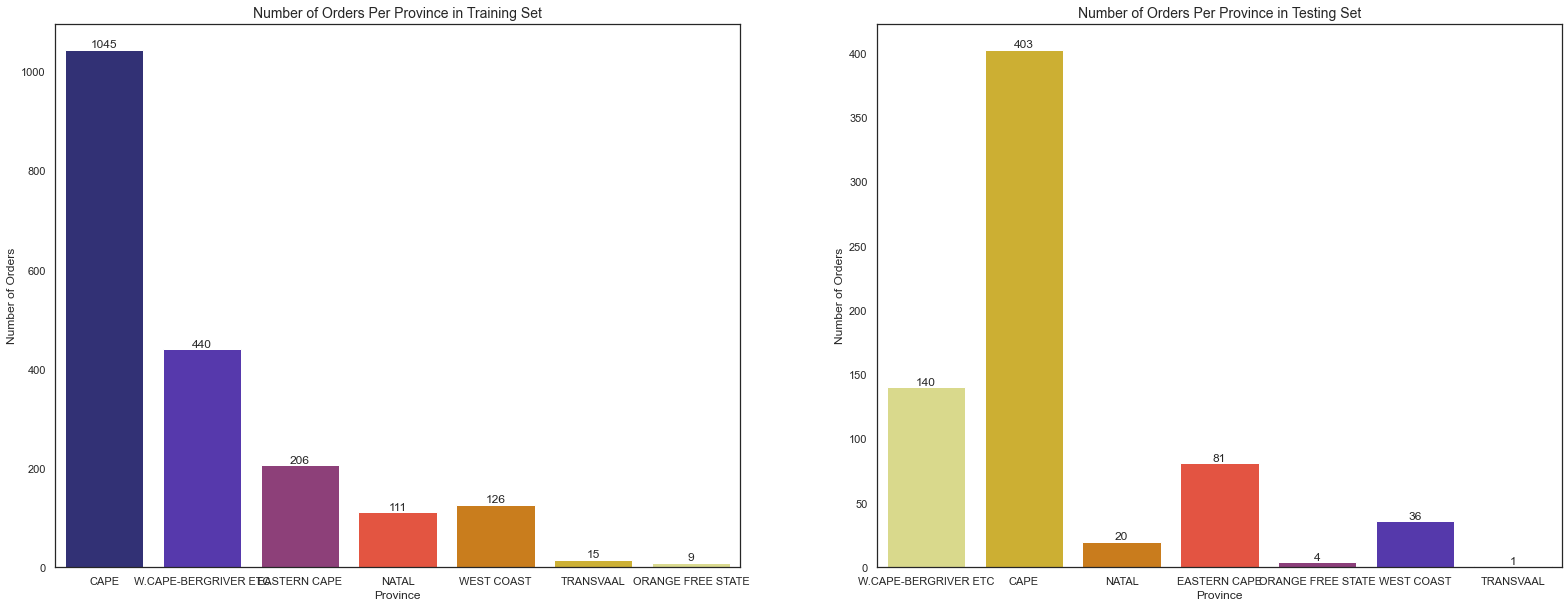

In [106]:
# Number of Orders Per Provience
fig,axis = plt.subplots(ncols=2, figsize=(27, 10))

# Training set
ax1_PT = sns.countplot(x='Province',data=train_data,palette='CMRmap',ax=axis[0])
axis[0].set_title('Number of Orders Per Province in Training Set',fontsize=14)
axis[0].set_xlabel('Province')
axis[0].set_ylabel('Number of Orders')
for p in ax1_PT.patches:
    ax1_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
# Testing set
ax2_PT = sns.countplot(x='Province',data=test_data,palette='CMRmap_r',ax=axis[1])
axis[1].set_title('Number of Orders Per Province in Testing Set',fontsize=14)
axis[1].set_xlabel('Province')
axis[1].set_ylabel('Number of Orders')
for p in ax2_PT.patches:
    ax2_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

The province that has a large number of orders is CAPE for both the training and testing dataset followed by W.CAPE-BERGRIVER ETC which shows that most of our data is from two provinces.

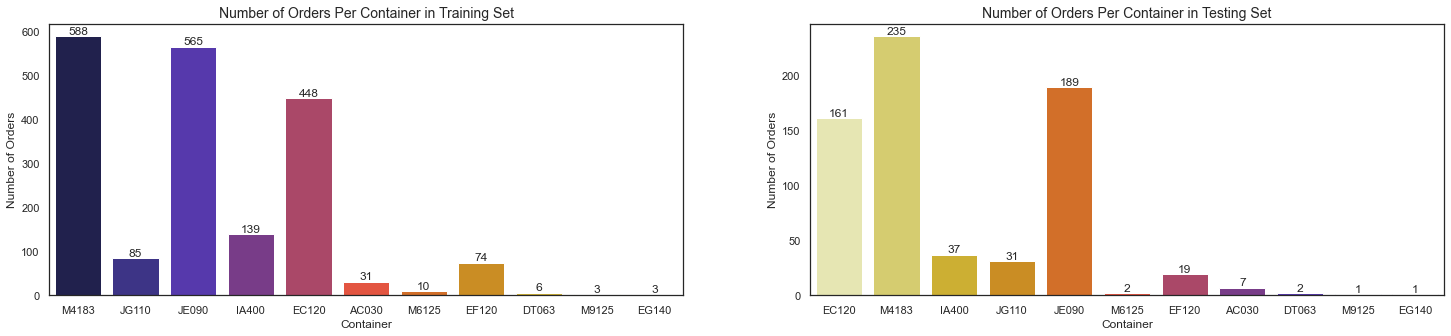

In [107]:
# Number of Orders Per Container Type
fig,axis = plt.subplots(ncols=2, figsize=(25, 5))

# Training set
ax1_CT = sns.countplot(x='Container',data=train_data,palette='CMRmap',ax=axis[0])
axis[0].set_title('Number of Orders Per Container in Training Set',fontsize=14)
axis[0].set_xlabel('Container')
axis[0].set_ylabel('Number of Orders')
for p in ax1_CT.patches:
    ax1_CT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
# Testing set
ax2_CT = sns.countplot(x='Container',data=test_data,palette='CMRmap_r',ax=axis[1])
axis[1].set_title('Number of Orders Per Container in Testing Set',fontsize=14)
axis[1].set_xlabel('Container')
axis[1].set_ylabel('Number of Orders')
for p in ax2_CT.patches:
    ax2_CT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

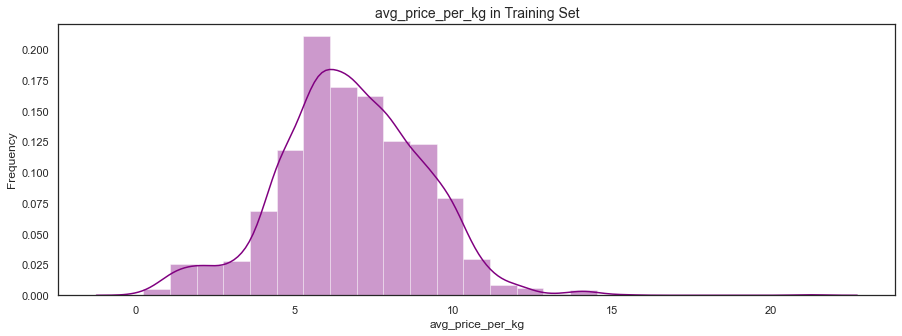

In [110]:
# Distribution of avg_price_per_kg
fig,axis = plt.subplots(ncols = 1, figsize=(15, 5))

# Training set
sns.distplot(train_data['avg_price_per_kg'],bins = 25,color = 'purple',ax = axis)
axis.set_title('avg_price_per_kg in Training Set',fontsize=14)
axis.set_xlabel('avg_price_per_kg')
axis.set_ylabel('Frequency')

plt.show()

Our target variable has taken the shape of a normal distribution but outliers distorted it with a mean of 6 roughly.

<a id="preprocessing"></a>
## 5. Data Preprocessing

### Feature Engineering

**Transforming the Target (Dependent) Variable:**  
One of the most important assumptions for statistical tests and regression is the assumption of normality. Non-normal dependent variables can be transformed to a normal shape through a Box Cox transformation. By normalising our data, we are able to perform a much broader number of tests.  
(Source: https://www.statisticshowto.com/box-cox-transformation/)

Outliers in normally distributed variables can be removed based on their Z-score values. Generally, a threshold of 3 or -3 is used (i.e if the Z-score value is greater than 3 or less than -3, that data point will be identified as an outlier).  
(Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [111]:
# Transform target variable and remove high zscores
train_data_t = train_data.copy()
train_data_t['transformed'] = boxcox(train_data['avg_price_per_kg'])[0]
train_data_t['zscore'] = zscore(train_data_t['transformed'])
train_data_t = train_data_t[train_data_t['zscore'].abs() < 3]
train_data_t = train_data_t.drop('zscore', axis=1)
print(str(len(train_data)-len(train_data_t)) + " additional outliers were removed")

10 additional outliers were removed


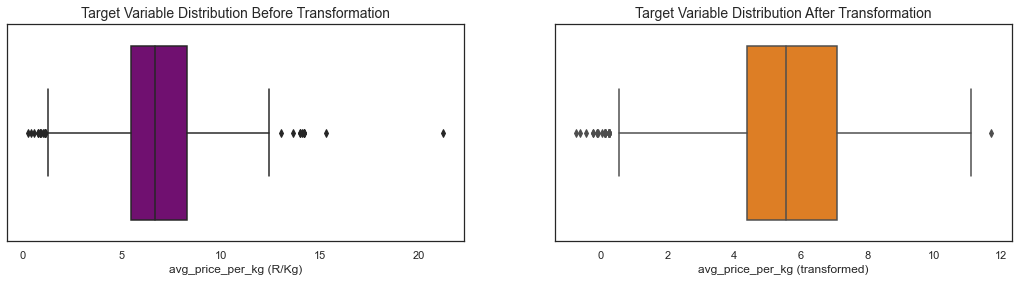

In [112]:
# Distribution of Distance from Pickup to Destination
fig,axis = plt.subplots(ncols=2, figsize=(18, 4))

# Before
sns.boxplot(x=train_data['avg_price_per_kg'],color='purple',ax=axis[0])
axis[0].set_title('Target Variable Distribution Before Transformation',fontsize=14)
axis[0].set_xlabel('avg_price_per_kg (R/Kg)')
# After
sns.boxplot(x=train_data_t['transformed'],color='#fb7d07',ax=axis[1])
axis[1].set_title('Target Variable Distribution After Transformation',fontsize=14)
axis[1].set_xlabel('avg_price_per_kg (transformed)')

plt.show()

### Encoding Categorical Data

Feature encoding is the process of converting categorical variables to continuous variables. This is important because most machine learning algorithms perform better when all the variables are in a numerical format. We have five variables which are not in numeric form, "Province", "Container", "Size_Grade","Commodities" and "Date". As we have mentioned that our dataset will contain one commodity meaning the column for commodity is not changing much so it can be dropped since it is not a feature that contributes to the average preice per kilogram. We used getdummies to transform these variables, also known as One Hot encoding takes a columnn which has been label encoded and splits it into multiple columns, each number containing a 0 or 1.

#### Checking how many outcomes are contained in each non numeric feature for both datatypes 

In [113]:
# Change 'Province' data type
train_data_t['Province'] = train_data_t['Province'].astype(str)

# Check how many unique items are in each column of indepedent variables
for col_name in train_data_t.columns:
    if train_data_t[col_name].dtypes=='object':
        unique_out = len(train_data_t[col_name].unique())
        print(f"Feature '{col_name}' has {unique_out} unique catergories")

Feature 'Province' has 7 unique catergories
Feature 'Container' has 11 unique catergories
Feature 'Size_Grade' has 10 unique catergories
Feature 'Commodities' has 1 unique catergories
Feature 'Date' has 147 unique catergories


In [114]:
test_data.set_index('Index', inplace=True)

In [115]:
train = train_data.copy()
test = test_data.copy()

### Encoding all the categorical variables

In [116]:
train = pd.get_dummies(train_data, columns=['Province', 'Container', 'Size_Grade','Commodities'],drop_first = True)
test= pd.get_dummies(test_data, columns=['Province', 'Container', 'Size_Grade','Commodities'],drop_first = True)
train['avg_price_per_kg'] = train.pop('avg_price_per_kg')
train= train.drop('Date', axis=1)
test= test.drop('Date', axis=1)
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_test = test.iloc[:,:].values


### Split Training Set Into Training and Validation Sets

* Training data: Data that contains a known output and the model learns on this data in order to be able to generalize other data later on.
* Validation data: This data is used to assess how well the algorithm was trained with the training data.
* Test data: Data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


### Feature Scaling

In [118]:
# Make new copies for scaling
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Apply scaler to numeric features
sc = StandardScaler()
X_train_scaled[:,4:] = sc.fit_transform(X_train[:,4:])
X_val_scaled[:,4:] = sc.transform(X_val[:,4:])
X_test_scaled[:,4:] = sc.transform(X_test[:,4:])

### Feature Selection

In [119]:
# Convert to dataframes
all_columns = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Province_EASTERN CAPE',
       'Province_NATAL', 'Province_ORANGE FREE STATE', 'Province_TRANSVAAL',
       'Province_W.CAPE-BERGRIVER ETC', 'Province_WEST COAST',
       'Container_DT063', 'Container_EC120', 'Container_EF120',
       'Container_EG140', 'Container_IA400', 'Container_JE090',
       'Container_JG110', 'Container_M4183', 'Container_M6125',
       'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S', 'Size_Grade_1U',
       'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M', 'Size_Grade_2S',
       'Size_Grade_2U', 'Size_Grade_2X' ]
# Not scaled
X_train_df = pd.DataFrame(X_train,columns=all_columns)
X_val_df = pd.DataFrame(X_val,columns=all_columns)
X_test_df = pd.DataFrame(X_test,columns=all_columns)
X_all_df = pd.DataFrame(X,columns=all_columns)
# Scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=all_columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled,columns=all_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=all_columns)
# Convert to numeric
X_train_scaled_df = X_train_scaled_df.apply(pd.to_numeric)
X_val_scaled_df = X_val_scaled_df.apply(pd.to_numeric)
X_test_scaled_df = X_test_scaled_df.apply(pd.to_numeric)
X_train_df = X_train_df.apply(pd.to_numeric)
X_val_df = X_val_df.apply(pd.to_numeric)
X_test_df = X_test_df.apply(pd.to_numeric)
X_all_df = X_all_df.apply(pd.to_numeric)

X_train_scaled_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,9.0,55.0,65.0,1275.0,-0.538134,-0.459554,-0.548228,2.918611,-0.242947,-0.067116,...,-0.043881,-0.439801,-0.621549,-0.025318,-0.310174,-0.258816,2.744095,-0.422035,-0.088017,-0.119562
1,400.0,1200.0,1200.0,1200.0,-0.607961,-0.425434,-0.535630,-0.342629,-0.242947,-0.067116,...,-0.043881,-0.439801,1.608883,-0.025318,-0.310174,-0.258816,-0.364419,-0.422035,-0.088017,-0.119562
2,12.0,80.0,104.0,4008.0,-0.461324,-0.406676,-0.469839,-0.342629,-0.242947,-0.067116,...,-0.043881,2.273755,-0.621549,-0.025318,-0.310174,-0.258816,-0.364419,-0.422035,-0.088017,-0.119562
3,12.0,84.0,96.0,1584.0,-0.548608,-0.455188,-0.185679,-0.342629,-0.242947,-0.067116,...,-0.043881,-0.439801,1.608883,-0.025318,-0.310174,-0.258816,-0.364419,-0.422035,-0.088017,-0.119562
4,12.0,120.0,128.0,4704.0,-0.478781,-0.416379,-0.499235,-0.342629,-0.242947,-0.067116,...,-0.043881,-0.439801,1.608883,-0.025318,-0.310174,-0.258816,-0.364419,-0.422035,-0.088017,-0.119562


We visuals the correlation between the independent variables to check which variables can be included in the final model.

In [120]:
# Recursive Feature Elimination
lgbm_model = lgbm.LGBMRegressor(learning_rate=0.1, min_data_in_leaf=250, num_leaves=50, objective='regression')
rfe = RFE(lgbm_model, 13)
rfe = rfe.fit(X_train, y_train)
# Summarize the selected features
keep_df = pd.DataFrame(rfe.support_,X_train_df.columns).reset_index()
keep_df = keep_df[keep_df[0]==True]
keep_df = keep_df.drop(0,axis=1)
keep_df.rename(columns={'index':'Feature'}).style.hide_index()

[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 13
[LightGBM] [Info] Start training from score 6.802633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of dat

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Feature
Weight_Kg
Low_Price
High_Price
Sales_Total
Total_Qty_Sold
Total_Kg_Sold
Stock_On_Hand
Province_W.CAPE-BERGRIVER ETC
Container_EC120
Container_JE090


In [121]:
# Final features used in model
features =  ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Province_EASTERN CAPE',
       'Province_NATAL', 'Province_ORANGE FREE STATE', 'Province_TRANSVAAL',
       'Province_W.CAPE-BERGRIVER ETC', 'Province_WEST COAST',
       'Container_DT063', 'Container_EC120', 'Container_EF120',
       'Container_EG140', 'Container_IA400', 'Container_JE090',
       'Container_JG110', 'Container_M4183', 'Container_M6125',
       'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S', 'Size_Grade_1U',
       'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M', 'Size_Grade_2S',
       'Size_Grade_2U', 'Size_Grade_2X', ]
X_all = pd.DataFrame(X_all_df.loc[:,features],columns=features).values
X_train = pd.DataFrame(X_train_df.loc[:,features],columns=features).values
X_val = pd.DataFrame(X_val_df.loc[:,features],columns=features).values
X_test = pd.DataFrame(X_test_df.loc[:,features],columns=features).values
X_train_scaled = pd.DataFrame(X_train_scaled_df.loc[:,features],columns=features).values
X_val_scaled = pd.DataFrame(X_val_scaled_df.loc[:,features],columns=features).values

<a id="modelling"></a>
## 6. Modelling

### CatBoost Regression

CatBoost is a machine learning algorithm that uses gradient boosting on decision trees.

In [122]:
modelstart= time.time()
cb_model = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 0,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train, eval_set=(X_val,y_val), use_best_model=True,verbose=True)
y_pred_val = cb_model.predict(X_val)
cb_model_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_val))
cb_model_r2 = metrics.r2_score(y_val, y_pred_val)
print('RMSE:', cb_model_rmse)
print('R-squared:', cb_model_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

0:	learn: 2.2143797	test: 2.2377650	best: 2.2377650 (0)	total: 371ms	remaining: 4m 19s
75:	learn: 1.0179910	test: 1.0741032	best: 1.0741032 (75)	total: 17.4s	remaining: 2m 23s
150:	learn: 0.6808264	test: 0.7679329	best: 0.7679329 (150)	total: 33.4s	remaining: 2m 1s
225:	learn: 0.5447580	test: 0.6751722	best: 0.6751722 (225)	total: 49.8s	remaining: 1m 44s
300:	learn: 0.4607775	test: 0.6356531	best: 0.6356531 (300)	total: 1m 7s	remaining: 1m 29s
375:	learn: 0.4003074	test: 0.6082941	best: 0.6082941 (375)	total: 1m 23s	remaining: 1m 12s
450:	learn: 0.3536048	test: 0.5904075	best: 0.5904075 (450)	total: 1m 41s	remaining: 56.1s
525:	learn: 0.3184649	test: 0.5780496	best: 0.5780496 (525)	total: 1m 58s	remaining: 39.3s
600:	learn: 0.2871319	test: 0.5695803	best: 0.5695407 (599)	total: 2m 17s	remaining: 22.6s
675:	learn: 0.2620431	test: 0.5625121	best: 0.5625121 (675)	total: 2m 34s	remaining: 5.49s
699:	learn: 0.2544815	test: 0.5606793	best: 0.5606793 (699)	total: 2m 39s	remaining: 0us

bestTe

### Random Forest Regression

Random forest models are an example of an ensemble method that is built on decision trees (i.e. it relies on aggregating the results of an ensemble of decision trees). Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree. In random forest models, the trees are randomized and the model returns the mean prediction of all the individual trees.

In [123]:
modelstart= time.time()
rf = RandomForestRegressor(random_state = 0, n_estimators= 300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
rf_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: Random Forest Regression")
print('RMSE:', rf_rmse)
print('R-squared:', rf_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

Testing: Random Forest Regression
RMSE: 0.5926252795396231
R-squared: 0.931441562791602
Model Runtime: 4.18 seconds


### XGBoost Regression

XGBoost (e**X**treme **G**radient **B**oosting) is  a decision-tree-based algorithm that provides  scalability and uses gradient boosting framework for efficiency, flexibility  and portability.

In [124]:
modelstart= time.time()
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_val)
xg_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
xg_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: XGBoost")
print('RMSE:', xg_rmse)
print('R-squared:', xg_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

Testing: XGBoost
RMSE: 0.5066110551200546
R-squared: 0.9498985969487215
Model Runtime: 0.47 seconds


### LightGBM Regression

Lightgbm (**Light** **G**radient **B**oosting **M**achine)  is a gradient boosting framework that uses tree based learning algorithms (decision trees) for better accuracy, lower memory usage and capability  of handling large-scale data.

In [125]:
modelstart= time.time()
lgbm_model = lgbm.LGBMRegressor(learning_rate=0.1, min_data_in_leaf=250, num_leaves=50, objective='regression')
lgbm_model.fit(X_train,y_train)
y_pred = lgbm_model.predict(X_val)
lgbm_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred))
lgbm_r2 = metrics.r2_score(y_val, y_pred)

print("Testing: LightGBM")
print('RMSE:', lgbm_rmse)
print('R-squared:', lgbm_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 13
[LightGBM] [Info] Start training from score 6.802633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

<a id="evaluation"></a>
## 7. Performance Evaluation

### Compare Models on Performance Metrics

We can compare the performance of each of our models using two statistical measures that determine the average squared difference between the estimated values and the actual value (**MSE**) and the proportion of variance explained by the model ($R^2$):  

**Mean Squared Error (MSE):**  
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R-squared ($R^2$):**
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$  

For this project, we will be looking at the root mean squared error (RMSE). The lower the RMSE of the model, the better the regression line fits the data.

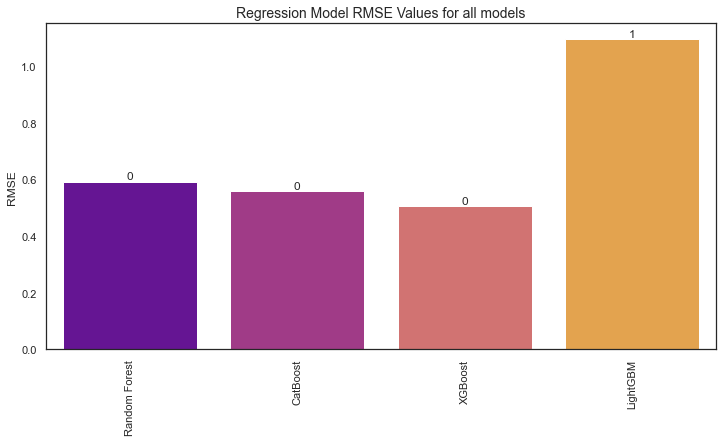

In [126]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(12, 6))
rmse_x = ['Random Forest','CatBoost','XGBoost','LightGBM']
rmse_y = [rf_rmse,cb_model_rmse,xg_rmse,lgbm_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='plasma')
plt.title('Regression Model RMSE Values for all models',fontsize=14)
plt.ylabel('RMSE')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

plt.show()

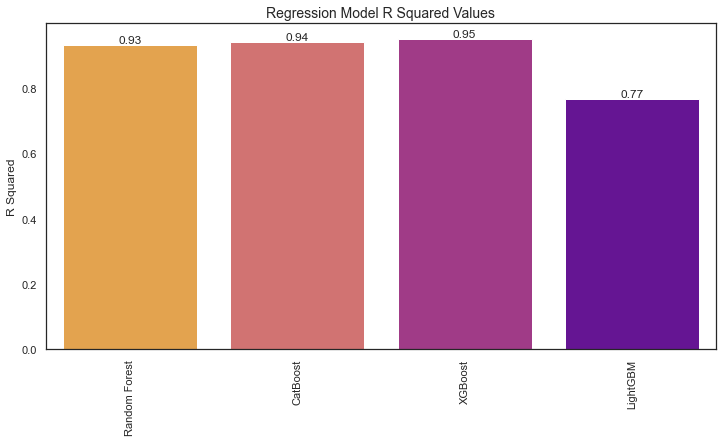

In [127]:
# Compare R squared values between models
fig,axis = plt.subplots(figsize=(12, 6))
rmse_x = ['Random Forest','CatBoost','XGBoost','LightGBM']
rmse_y = [rf_r2,cb_model_r2,xg_r2,lgbm_r2]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='plasma_r')
plt.title('Regression Model R Squared Values',fontsize=14)
plt.ylabel('R Squared')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
plt.show()

The higher $R^2$ the better the regression line fits the data as seen from the above graph of $R^2$ values for each model.

### Comparing models with a RMSE less than 1

In [128]:
reg = [RandomForestRegressor(random_state=0),lgbm.LGBMRegressor(random_state=0),xgb.XGBRegressor()]
cross_val = []
for r in reg:
    cross_val.append(np.sqrt(abs(cross_val_score(r, X_train, y=y_train, scoring='neg_mean_squared_error', cv=KFold(n_splits=5, random_state=0, shuffle=True)))))
cross_val_mean = [i.mean() for i in cross_val] 
cross_val_df = pd.DataFrame({"Model": ["RandomForest", "LightGBM",'XGBBOOST'],"Mean RMSE": cross_val_mean})
pd.DataFrame(cross_val_df.sort_values("Mean RMSE", ascending=True))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 1248, number of used features: 23
[LightGBM] [Info] Start training from score 6.794647
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 1249, number of used features: 23
[LightGBM] [Info] Start training from score 6.822930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 1249, number of used features: 23
[LightGBM] [Info] Start traini

,Model,Mean RMSE
2,XGBBOOST,0.559663
1,LightGBM,0.562029
0,RandomForest,0.614161


This shows that XGBBOOST has the lowest RMSE which makes it the best

In [129]:
# LightGBM
lgbm_dict = {
    'num_leaves': [50], #[10, 50, 150]
    'min_data_in_leaf': [250], #[50, 250, 500]
    'learning_rate': [0.1], #[0.1, 0.05, 0.001]
    'objective': ['regression']}
lgbm_gridsearch = GridSearchCV(estimator = lgbm.LGBMRegressor(random_state=0), cv=KFold(n_splits=5, random_state=0, shuffle=True), scoring='neg_mean_squared_error', param_grid=lgbm_dict, n_jobs=-1)
lgbm_best = lgbm_gridsearch.fit(X_train, y_train)
lgbm_parameters = lgbm_best.best_params_
lgbm_score = np.sqrt(abs(lgbm_best.best_score_))
print('***LightGBM***')
print(round(lgbm_score,2),lgbm_parameters)

# Random Forest
rf_dict = { 
    'max_features':[5], #[1, 3, 5]
    'min_samples_split':[2], #[2, 5, 10]
    'min_samples_leaf': [1], #[1, 3]
    'n_estimators':[300]} #[100, 200, 300]
rf_gridsearch = GridSearchCV(RandomForestRegressor(random_state=0), cv=KFold(n_splits=5, random_state=0, shuffle=True), scoring='neg_mean_squared_error', param_grid=rf_dict, n_jobs=-1)
rf_best = rf_gridsearch.fit(X_train, y_train)
rf_parameters = rf_best.best_params_
rf_score = np.sqrt(abs(rf_best.best_score_))
print('***Random Forest***')
print(round(rf_score,2), rf_parameters)
# Random Forest
XGB_dict = { 
    'max_features':[5], #[1, 3, 5]
    'min_samples_split':[2], #[2, 5, 10]
    'min_samples_leaf': [1], #[1, 3]
    'n_estimators':[300]} #[100, 200, 300]
rf_gridsearch = GridSearchCV(RandomForestRegressor(random_state=0), cv=KFold(n_splits=5, random_state=0, shuffle=True), scoring='neg_mean_squared_error', param_grid=rf_dict, n_jobs=-1)
rf_best = rf_gridsearch.fit(X_train, y_train)
rf_parameters = rf_best.best_params_
rf_score = np.sqrt(abs(rf_best.best_score_))
print('***Random Forest***')
print(round(rf_score,2), rf_parameters)

[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Warning] min_data_in_leaf is set=250, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=250
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 13
[LightGBM] [Info] Start training from score 6.802633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

***Random Forest***
0.73 {'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
***Random Forest***
0.73 {'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [130]:
modelstart= time.time()
final_model = xgb.XGBRegressor(max_features= 5, min_samples_leaf=1, min_samples_split= 2, n_estimators= 300)
final_model.fit(X_train,y_train)
y_pred_val_final = final_model.predict(X_val)
y_pred_test_final = final_model.predict(X_test)
final_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_val_final))
final_r2 = metrics.r2_score(y_val, y_pred_val_final)
print("Testing: Xgb")
print('RMSE:', final_rmse)
print('R-squared:', final_r2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)/60))

Testing: Xgb
RMSE: 0.5005297880531446
R-squared: 0.9510941940347427
Model Runtime: 0.01 seconds


Correlation coefficient: 0.98


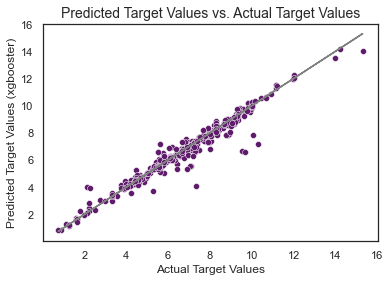

In [131]:
# Predicted Target Values vs. Actual Target Values
sns.scatterplot(x=y_val, y=y_pred_val_final, color="#5f1b6b")
plt.plot(y_val,y_val,color="gray")
plt.title("Predicted Target Values vs. Actual Target Values", fontsize=14)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values (xgbooster)")
r = np.corrcoef(y_val,y_pred_val_final)[0,1]
print("Correlation coefficient: " + str(round(r,2)))
plt.show()

<a id="conclusion"></a>
## 9. Conclusion

  We succeeded in building a regression model that is able to predict the price per kilogram of golden apple delicious. In order to identify the best performing model for this challenge, we tested 9 different regression models that all delivered RMSE values below 2.5, and 4 delivered an RMSE value below 1.

Cross validation testing and hyperparameter tuning were performed on the 4 models that had the lowest RMSE values, the highest R-squared values, and relatively fast runtimes. Our performance evaluations show that the eXtreme Gradient Boosting Method regression model delivered the best RMSE and R-squared values based on our validation set.

We also see that our chosen model performs well on the validation set, as there is a strong positive correlation of 0.98 between our predicted target values and the actual values. Almost all of the features included in the model have importance values.